In [25]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
sns.set()
import matplotlib.pyplot as plt

In [2]:
def read_csv(file_path, has_header=True):
    with open(file_path) as f:
        if has_header: f.readline()
        data = []
        for line in f:
            line = line.strip().split(",")
            data.append([x for x in line])
    return data

In [3]:
datasetfile = "ML/training/GCDay1stats.csv"

In [4]:
dataset = read_csv(datasetfile)
X = np.array([z[1:] for z in dataset])
y = np.array([z[0] for z in dataset])

In [5]:
snis, counts = np.unique(y, return_counts=True)

In [6]:
top_ten = sorted(zip(counts, snis))[-10:]
counts = [x for x, _ in top_ten]
top_snis = [x for _, x in top_ten]

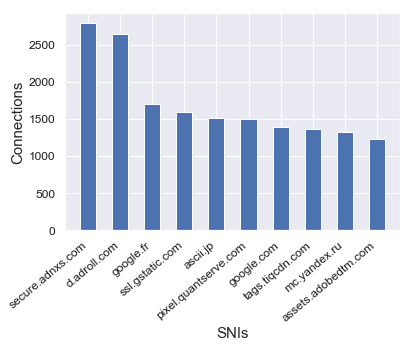

In [81]:
width = 0.5
plt.bar([x for x in reversed(top_snis)], [x for x in reversed(counts)],width)
plt.xticks(color='k',rotation=40, size=12, ha='right')
plt.yticks( color='k', size=12)
plt.xlabel('SNIs', fontsize= 15)
plt.ylabel('Connections', fontsize= 15)


plt.savefig('classes.png', bbox_inches='tight')

plt.show()

In [8]:
dataset = read_csv('final_results.csv')
df = pd.DataFrame(dataset)


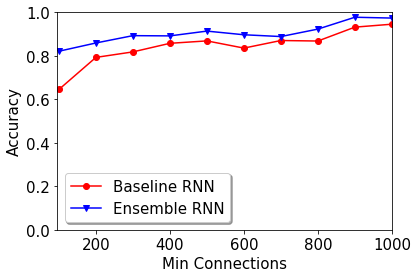

In [17]:
legend_format =  ['-or', '-vb']
idx= 0
for k1, v1 in df.groupby([0], as_index=False):
    if k1 not in ['Baseline RNN', 'Ensemble RNN']:
        continue
    x = []
    y = []
    for k2, v2 in v1.groupby([1], as_index=False):
        x.append(pd.to_numeric(k2))
        y.append(pd.to_numeric(v2[2]).mean())
    
    xp = [i for i, _ in sorted(zip(x,y))]
    yp = [i for _, i in sorted(zip(x,y))]
    plt.plot(xp, yp, legend_format[idx],linewidth=1.5,markersize=6, label=k1)
    idx += 1
    
plt.xticks( color='k', size=15)
plt.yticks( color='k', size=15)
plt.xlabel('Min Connections', fontsize= 15)
plt.ylabel('Accuracy', fontsize= 15)
plt.ylim(0.0,1)
plt.xlim(95,1000)
plt.legend(fontsize= 15, fancybox= True, shadow=True)
  
plt.savefig('classes.png', bbox_inches='tight')

plt.show()

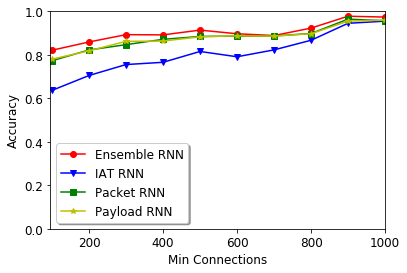

In [22]:
fontsize = 12
legend_format =  ['-or', '-vb', '-sg', '-*y']
idx= 0
for k1, v1 in df.groupby([0], as_index=False):
    if k1 not in ['IAT RNN', 'Packet RNN', 'Payload RNN', 'Ensemble RNN']:
        continue
    x = []
    y = []
    for k2, v2 in v1.groupby([1], as_index=False):
        x.append(pd.to_numeric(k2))
        y.append(pd.to_numeric(v2[2]).mean())
    
    xp = [i for i, _ in sorted(zip(x,y))]
    yp = [i for _, i in sorted(zip(x,y))]
    plt.plot(xp, yp, legend_format[idx],linewidth=1.5,markersize=6, label=k1)
    idx += 1

plt.xticks( color='k', size=fontsize)
plt.yticks( color='k', size=fontsize)
plt.xlabel('Min Connections', fontsize= fontsize)
plt.ylabel('Accuracy', fontsize= fontsize)
plt.ylim(0.0,1)
plt.xlim(95,1000)
plt.legend(fontsize= fontsize, fancybox= True, shadow=True)
  
plt.savefig('ensemble.png', bbox_inches='tight')

plt.show()

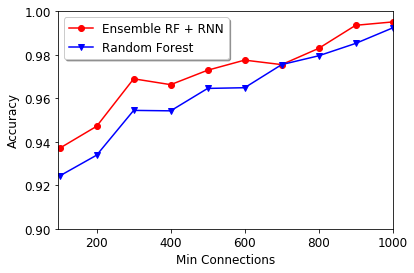

In [24]:
legend_format =  ['-or', '-vb']
idx= 0
for k1, v1 in df.groupby([0], as_index=False):
    if k1 not in ['Random Forest', 'Ensemble RF + RNN']:
        continue
    x = []
    y = []
    for k2, v2 in v1.groupby([1], as_index=False):
        x.append(pd.to_numeric(k2))
        y.append(pd.to_numeric(v2[2]).mean())
    
    xp = [i for i, _ in sorted(zip(x,y))]
    yp = [i for _, i in sorted(zip(x,y))]
    plt.plot(xp, yp,legend_format[idx],linewidth=1.5,markersize=6, label=k1)
    idx += 1
    plt.xlabel('Min Connections')
    plt.ylabel('Accuracy')
    
plt.xticks( color='k', size=fontsize)
plt.yticks( color='k', size=fontsize)
plt.xlabel('Min Connections', fontsize= fontsize)
plt.ylabel('Accuracy', fontsize= fontsize)
plt.ylim(0.9,1)
plt.xlim(95,1000)
plt.legend(fontsize= fontsize, fancybox= True, shadow=True)
  
plt.savefig('RFvsEnsemble.png', bbox_inches='tight')

plt.show()

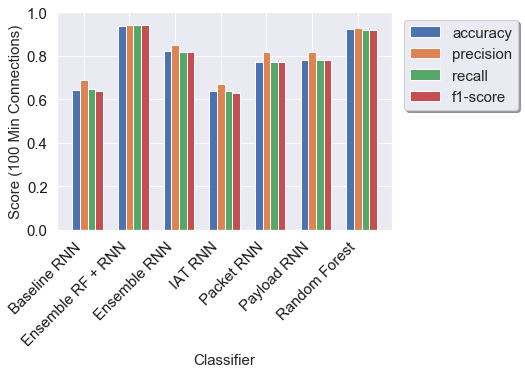

In [31]:
fontsize = 15
x = []
y1 = []
y2 = []
y3 = []
y4 = []
for k1, v1 in df.groupby([0], as_index=False):
    x.append(k1)
    for k2, v2 in v1.groupby([1], as_index=False):
        if pd.to_numeric(k2) != 100:
            continue
        y1.append(pd.to_numeric(v2[2]).mean())
        y2.append(pd.to_numeric(v2[3]).mean())
        y3.append(pd.to_numeric(v2[4]).mean())
        y4.append(pd.to_numeric(v2[5]).mean())
    
indices = np.arange(len(x))
width = np.min(np.diff(indices)) / 6.0

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(indices-width,y1,width,label='accuracy')
ax.bar(indices,y2,width,label='precision')
ax.bar(indices+width,y3,width,label='recall')
ax.bar(indices+width+width,y4,width,label='f1-score')
ax.set_xlabel('Classifier', fontsize = fontsize)
ax.set_ylabel('Score (100 Min Connections)', fontsize = fontsize)
ax.set_xticklabels(['Baseline RNN'] + x, rotation=45, ha = 'right')
ax.set_ylim(0.0,1)
ax.legend(bbox_to_anchor=(0.6, 0.0, 0.8, 1.0), fontsize = fontsize, fancybox= True, shadow=True)

plt.xticks( color='k', size= fontsize)
plt.yticks( color='k', size= fontsize)
plt.savefig('metrics.png', bbox_inches='tight')
plt.show()


In [33]:
dataset = read_csv('class_results.csv', has_header=False)
df = pd.DataFrame(dataset)

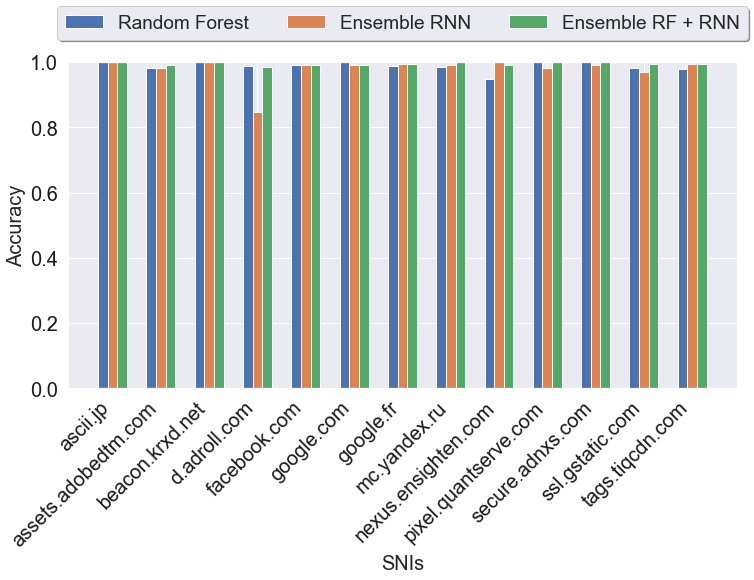

'\nfor item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):\n    item.set_fontsize(12)\n'

In [65]:
fontsize = 20
x = []
y = []
snis = []
header = True
for row in df.iterrows():
    index, data = row
    if header:
        snis = data.tolist()[1:]
        header = False
        continue
    
    acc = [float(i) for i in data.tolist()[1:]]
    y.append(acc)
    x.append(data.tolist()[0])
    
indices = np.arange(len(y[0]))
width = np.min(np.diff(indices)) / 5.0

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax.bar(indices-width,y[0],width,label=x[0])
#ax.bar(indices-width-width,y[1],width,label=x[1])
#ax.bar(indices-width,y[2],width,label=x[2])
#ax.bar(indices,y[3],width,label=x[3])
#ax.bar(indices+width,y[4],width,label=x[4])
ax.bar(indices,y[5],width,label=x[5])
ax.bar(indices+width,y[6],width,label=x[6])
ax.set_xlabel('SNIs',fontsize = fontsize)
ax.set_ylabel('Accuracy',fontsize = fontsize)
ax.set_xticks(range(len(y[0])))
ax.set_xticklabels(snis, rotation=45, ha = 'right')
ax.set_ylim(0.0,1)
ax.legend(ncol = 3, loc = 'upper center', bbox_to_anchor=(0.5,1.2), fontsize = 19, fancybox= True, shadow=True)

plt.xticks( color='k', size= fontsize)
plt.yticks( color='k', size= fontsize)
plt.savefig('perSNIBest.png', bbox_inches='tight')
plt.show()

"""
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(12)
"""

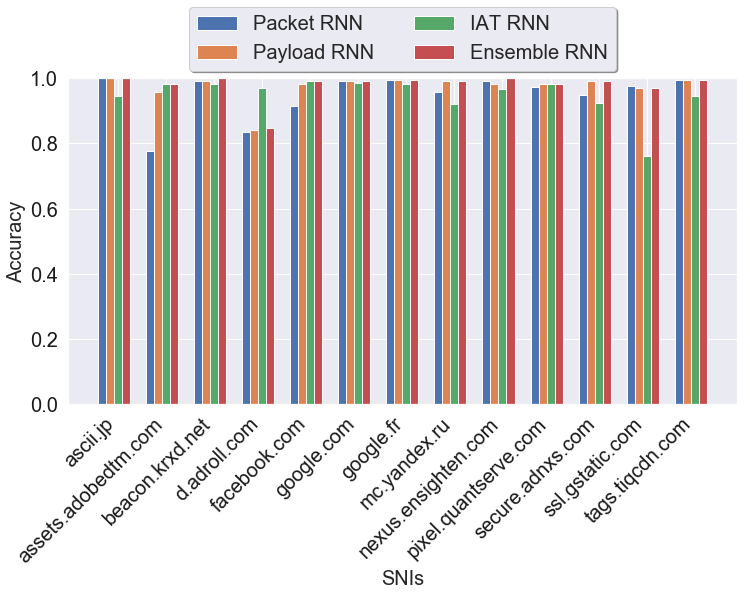

In [74]:
indices = np.arange(len(y[0]))
width = np.min(np.diff(indices)) / 6.0

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
#ax.bar(indices+width,y[0],width,label=x[0])
#ax.bar(indices-width-width,y[1],width,label=x[1])
ax.bar(indices-width-width,y[2],width,label=x[2])
ax.bar(indices-width,y[3],width,label=x[3])
ax.bar(indices,y[4],width,label=x[4])
ax.bar(indices+width,y[5],width,label=x[5])
#ax.bar(indices+width+width+width,y[6],width,label=x[6])
ax.set_xlabel('SNIs',fontsize = fontsize)
ax.set_ylabel('Accuracy',fontsize = fontsize)
ax.set_xticks(range(len(y[0])))
ax.set_xticklabels(snis, rotation=45, ha = 'right')
ax.set_ylim(0.0,1)
ax.legend(ncol = 2, loc = 'upper center', bbox_to_anchor=(0.5,1.25), fontsize = fontsize, fancybox= True, shadow=True)

plt.xticks( color='k', size= fontsize)
plt.yticks( color='k', size= fontsize)
plt.savefig('perSNIEnsemble.png', bbox_inches='tight')
plt.show()
